Taylor expansion at n=1 x
Taylor expansion at n=3 x**3/3 - x**2/2 + x
Taylor expansion at n=5 x**5/5 - x**4/4 + x**3/3 - x**2/2 + x
Taylor expansion at n=7 x**7/7 - x**6/6 + x**5/5 - x**4/4 + x**3/3 - x**2/2 + x
Taylor expansion at n=9 x**9/9 - x**8/8 + x**7/7 - x**6/6 + x**5/5 - x**4/4 + x**3/3 - x**2/2 + x


C:\Users\Ivaylo\Anaconda3\lib\site-packages\numpy\__init__.py:1: RuntimeWarning: invalid value encountered in log
  """


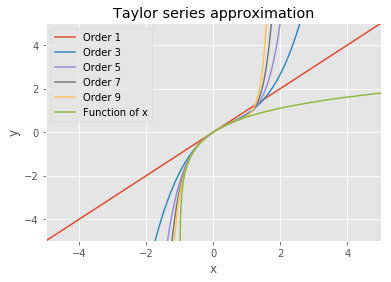

In [1]:
import sympy as sy
import numpy as np
from sympy.functions import sin, cos, ln
import matplotlib.pyplot as plt
plt.style.use("ggplot")

# Factorial function
def factorial(n):
    if n <= 0:
        return 1
    else:
        return n * factorial(n - 1)

# Taylor approximation at x0 of the function 'function'
def taylor(function, x0, n, x = sy.Symbol('x')):
    i = 0
    p = 0
    while i <= n:
        p = p + (function.diff(x, i).subs(x, x0))/(factorial(i))*(x - x0)**i
        i += 1
    return p

def plot(f, x0 = 0, n = 9, by = 2, x_lims = [-5, 5], y_lims = [-5, 5], npoints = 800, x = sy.Symbol('x')):
    x1 = np.linspace(x_lims[0], x_lims[1], npoints)
    # Approximate up until n starting from 1 and using steps of by
    for j in range(1, n + 1, by):
        func = taylor(f, x0, j)
        taylor_lambda = sy.lambdify(x, func, "numpy")
        print('Taylor expansion at n=' + str(j), func)
        plt.plot(x1, taylor_lambda(x1), label = 'Order '+ str(j))
    # Plot the function to approximate (sine, in this case)
    func_lambda = sy.lambdify(x, f, "numpy")
    plt.plot(x1, func_lambda(x1), label = 'Function of x')
    
    plt.xlim(x_lims)
    plt.ylim(y_lims)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.title('Taylor series approximation')
    plt.show()

# Define the variable and the function to approximate
x = sy.Symbol('x')
f = ln(1 + x)
plot(f)